# Dataset Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

In [ ]:
!ls /content/drive/My\ Drive/Calibration_Data_One_Layer_925_nm/channel_1/

ch1_H1.txt  ch1_H2.txt	ch1_H3.txt


In [ ]:
def create_dataset (path = '/content/drive/My Drive/Calibration_Data_One_Layer_925_nm', ch = [1, 2, 3, 4], H = [1, 2, 3]):
    """Generates a dataset (X, Y) for calibration from experimental data files.

    Args:
        path (str, optional): Path to the directory containing the data files.
            Defaults to a Google Drive path.
        ch (list[int], optional): List of channel numbers to include.
        H (list[int], optional): List of height indices to include.
    Returns:
        tuple[list, list]: A tuple containing:
            - X (list): Input features, where each element is a nested list of the form:
                [[input_vector], [squared_currents]].
            - Y (list): Normalized target outputs.
    """
    X = []
    Y = []
    for i in ch:
        for j in H:
            file = f'{path}/channel_{i}/ch{i}_H{j}.txt'
            exp_data = np.loadtxt(file)
            for row in exp_data:
                curr = [0,0,0]
                curr[j-1] = row[0]
                el = [[0,0,0,0],np.array(curr)**2]
                el[0][i-1] = 1.
                X.append(el)
                y=row[1:]
                y=y/np.sum(y)
                y=y.tolist()
                Y.append(y)

    return X,Y

In [ ]:
X,Y = create_dataset()

In [ ]:
data = [[X[i], Y[i]] for i in range(len(X))]

In [ ]:
data[:10]

[[[[1.0, 0, 0, 0], array([0., 0., 0.])],
  [0.2922523700555737,
   0.03661327231121282,
   0.44655116050997057,
   0.2245831971232429]],
 [[[1.0, 0, 0, 0], array([100.,   0.,   0.])],
  [0.29288975864318334,
   0.03620352250489237,
   0.4461839530332681,
   0.22472276581865622]],
 [[[1.0, 0, 0, 0], array([400.,   0.,   0.])],
  [0.2921421584610369,
   0.036843821323769156,
   0.4466905771111836,
   0.22432344310401045]],
 [[[1.0, 0, 0, 0], array([900.,   0.,   0.])],
  [0.29308093994778067,
   0.03753263707571801,
   0.44614882506527415,
   0.22323759791122716]],
 [[[1.0, 0, 0, 0], array([1600.,    0.,    0.])],
  [0.2921971922951355,
   0.03754489063010121,
   0.44727391446294484,
   0.22298400261181853]],
 [[[1.0, 0, 0, 0], array([2500.,    0.,    0.])],
  [0.2924128948225334,
   0.036795831976554866,
   0.4490394008466298,
   0.221751872354282]],
 [[[1.0, 0, 0, 0], array([3600.,    0.,    0.])],
  [0.2923728813559322,
   0.03617992177314212,
   0.45078226857887876,
   0.220664928292

# Data Loader Preparation

In [ ]:
!pip install -q lightning tbparse

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.5/962.5 kB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import random
import lightning as L
import torch
import torch.nn as nn
def set_random_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
set_random_seed(42)
L.seed_everything(42)

INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42


42

In [ ]:
import matplotlib.pyplot as plt
import time
import math as ma
import cmath as cm
from sklearn.model_selection import train_test_split

In [ ]:
import lightning as L
from tqdm.notebook import tqdm
from lightning.pytorch import Trainer
from lightning.pytorch.callbacks import ModelCheckpoint
from lightning.pytorch.loggers import TensorBoardLogger
from torch.utils.data import Dataset, DataLoader

In [ ]:
class NormalizeTransform:
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, data):
        return (data - self.mean) / self.std


class CustomDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        inputs, target = self.data[idx]
        vector_intensities = torch.tensor(inputs[0], dtype=torch.float32)
        control_params = torch.tensor(inputs[1], dtype=torch.float32)
        target = torch.tensor(target, dtype=torch.float32)
        if self.transform:
            control_params = self.transform(control_params)
        return (vector_intensities, control_params), target

In [ ]:
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.3, random_state=42)

In [ ]:
control_params_list = []
for (_, control_params), _ in train_data:
    control_params_list.append(control_params)
control_params_array = np.array(control_params_list)
mean_params = control_params_array.mean(axis=0)
std_params = control_params_array.std(axis=0)

In [ ]:
mean_params

array([188523.90909091, 192823.36363636, 183428.54545455])

# Interferometer Physical Model

In [ ]:
batch_size = 1
train_loader = DataLoader(CustomDataset(train_data), batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(CustomDataset(val_data), batch_size=batch_size, shuffle=False,num_workers=2)
test_loader = DataLoader(CustomDataset(test_data), batch_size=batch_size, shuffle=False,num_workers=2)

In [ ]:
class OpticalCircuit(nn.Module):
    def __init__(self):
        super(OpticalCircuit, self).__init__()

        # initial_guesses
        self.f_0 = nn.Parameter(torch.randn(3, requires_grad=True))
        self.alpha = nn.Parameter(torch.tensor([
            [8.39, 1.71, -1.71],
            [2.71, 7.39, 0],
            [1, 1.71, 5.68]
        ], requires_grad=True))
        self.ph_1 = nn.Parameter(torch.randn(9, requires_grad=True))
        self.ph_2 = nn.Parameter(torch.randn(9, requires_grad=True))
        self.T_out = nn.Parameter(torch.tensor([0.5, 0.5, 0.5, 0.5], requires_grad=True))

        # right physical parameters

        # self.f_0 = nn.Parameter(torch.tensor([3.4053, 1.1007, 1.0538], requires_grad=True))
        # self.alpha = nn.Parameter(torch.tensor([[ 9.4689,  2.1221, -2.7717],
        # [ 3.8378,  8.4084, -0.4617],
        # [ 1.4071,  2.4967,  5.9975]], requires_grad=True))
        # self.ph_1 = nn.Parameter(torch.tensor([-1.0661,  1.5772, -2.0736,  1.0720,  2.2248,  1.5539, -0.9731,  1.1501,
        # -2.0016], requires_grad=True))
        # self.ph_2 = nn.Parameter(torch.tensor([ 1.1081, -1.5516, -1.8642,  1.0174, -0.9196, -1.6415, -0.8972,  1.1375,
        # -1.8579], requires_grad=True))
        # self.T_out = nn.Parameter(torch.tensor([1.2117, 1.7521, 1.6735, 1.4126], requires_grad=True))

    def forward(self, a_in, x):
        # a_in_complex = a_in.to(torch.complex64)
        a_in_sqrt = torch.sqrt(a_in)
        a_in_complex = a_in_sqrt.to(torch.complex64)
        batch_size = a_in.size(0)
        multiplier = torch.tensor(1e-6, requires_grad=True, device=a_in.device)
        alpha_1 = self.alpha * multiplier
        a_out_batch = []
        for i in range(batch_size):
            x_amperage = x[i]
            P = self.P_create(self.f_0, alpha_1, x_amperage)
            M1 = self.U_Create_rb(4, self.ph_1)
            M2 = self.U_Create_rb(4, self.ph_2)
            U = M2 @ P @ M1
            a_out = U @ a_in_complex[i]
            a_dec = torch.abs(a_out) ** 2
            a_dec_new = a_dec * self.T_out
            a_out_batch.append(a_dec_new / torch.sum(a_dec_new))
        return torch.stack(a_out_batch)

    def P_create(self, c_0, a, x):
        c = c_0 + a @ x
        P = torch.eye(4, dtype=torch.complex64, device=c.device)
        for i in range(3):
            P[i, i] = torch.exp(1j * c[i])
        return P

    def T_pq(self, N, p, q, theta, phi):
        T = torch.eye(N, dtype=torch.complex64, device=theta.device)
        T[p, p] = torch.exp(1j * phi) * torch.sin(theta / 2)
        T[p, q] = torch.exp(1j * phi) * torch.cos(theta / 2)
        T[q, p] = torch.cos(theta / 2)
        T[q, q] = -torch.sin(theta / 2)
        return T

    def U_Create_rb(self, N, phases):
        U = torch.eye(N, dtype=torch.complex64, device=phases.device)
        k = 0
        for p in range(N - 1, 0, -1):
            for q in range(p - 1, -1, -1):
                if (p == N - 1):
                    U = U @ self.T_pq(N, p, q, phases[k], torch.tensor(0.0, device=phases.device))
                    k += 1
                else:
                    U = U @ self.T_pq(N, p, q, phases[k], phases[k + 1])
                    k += 2
        return U

In [ ]:
first_batch = next(iter(train_loader))

In [ ]:
first_batch

[[tensor([[1., 0., 0., 0.]]), tensor([[     0., 240100.,      0.]])],
 tensor([[0.1714, 0.1409, 0.3172, 0.3705]])]

# Training 🏋

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/model3 --port 6010

In [ ]:
from torchmetrics import Metric
class R2Score(Metric):
    def __init__(self):
        super().__init__()
        self.add_state("preds", default=[], dist_reduce_fx="cat")
        self.add_state("targets", default=[], dist_reduce_fx="cat")

    def update(self, preds: torch.Tensor, target: torch.Tensor):
        self.preds.append(preds.detach())
        self.targets.append(target.detach())

    def compute(self):
        preds = torch.cat(self.preds, dim=0).flatten()
        targets = torch.cat(self.targets, dim=0).flatten()
        target_mean = torch.mean(targets)
        ss_res = torch.sum((targets - preds) ** 2)
        ss_tot = torch.sum((targets - target_mean) ** 2)
        r_squared = 1 - (ss_res / ss_tot)
        return r_squared.item()

    def reset(self):
        self.preds = []
        self.targets = []

In [ ]:
class LModel(L.LightningModule):
    def __init__(self, model, lr=0.01, gamma=0.9):
        super().__init__()
        self.save_hyperparameters(logger=False)
        self.lr = lr
        self.gamma = gamma
        self.model = model
        self.criterion = nn.MSELoss()
        self.r2_score = R2Score()

    def configure_optimizers(self):
        optimizer = torch.optim.AdamW(
            self.parameters(),
            lr=self.lr,
        )
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
            optimizer,
        )
        return {
            "optimizer": optimizer,
            "lr_scheduler": {
                "scheduler": scheduler,
                "interval": "epoch",
                "monitor": "loss"
            },
        }

    def training_step(self, batch, batch_idx):
        (vector_intensities, control_params), y = batch
        out = self.model(vector_intensities, control_params)
        loss = self.criterion(out, y)
        # self.log("loss", loss, prog_bar=True)
        return loss


    def validation_step(self, batch, batch_idx):
        (vector_intensities, control_params), y = batch
        out = self.model(vector_intensities, control_params)
        loss = self.criterion(out, y)
        self.log("loss", loss, prog_bar=True)
        self.r2_score.update(out, y)

    def on_validation_epoch_end(self):
        self.log("val/r2", self.r2_score.compute())
        self.r2_score.reset()

    def test_step(self, batch, batch_idx):
        (vector_intensities, control_params), y = batch
        out = self.model(vector_intensities, control_params)
        self.r2_score.update(out, y)

    def on_test_epoch_end(self):
        self.log("test/r2", self.r2_score.compute())
        self.r2_score.reset()

In [ ]:
from lightning.pytorch.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    # dirpath='best_ckp/'
    save_last=True,
    every_n_epochs=1,
    save_top_k=1,
    save_weights_only=True,
    monitor="val/r2",
    filename="model",
    mode="max",
)

# L.seed_everything(42)

model = OpticalCircuit()
pl_model = LModel(model)
trainer = L.Trainer(
    max_epochs=300,
    callbacks=[checkpoint_callback],
    num_sanity_val_steps=0,
    log_every_n_steps=10,
    logger=L.pytorch.loggers.TensorBoardLogger(save_dir="logs/model3/"),
)

trainer.fit(
    model=pl_model,
    train_dataloaders=train_loader,
    val_dataloaders=val_loader
)

# Plot Calibration Graphs

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
dataset = CustomDataset(data)

In [ ]:
model.eval()
def get_predictions(dataset):
    predictions = []
    for data in dataset:
        (inps, contr_params), y = data
        inps = inps.unsqueeze(0).float()
        contr_params = contr_params.unsqueeze(0).float()
        model_output = model(inps, contr_params)
        predictions.append(model_output)
    return predictions
predictions_list = get_predictions(dataset)

In [ ]:
def convert_predictions_to_list(predictions):
    predictions_list = []
    for prediction in predictions:
        prediction = prediction.squeeze(0).detach().numpy().tolist()
        predictions_list.append(prediction)
    return predictions_list

converted_predictions = convert_predictions_to_list(predictions_list)

In [ ]:
ans = np.array(converted_predictions)

In [ ]:
x = np.arange(0,1310,10)
A = 0.013
B = 0.05
X = A*x+B
Y = np.array(Y)

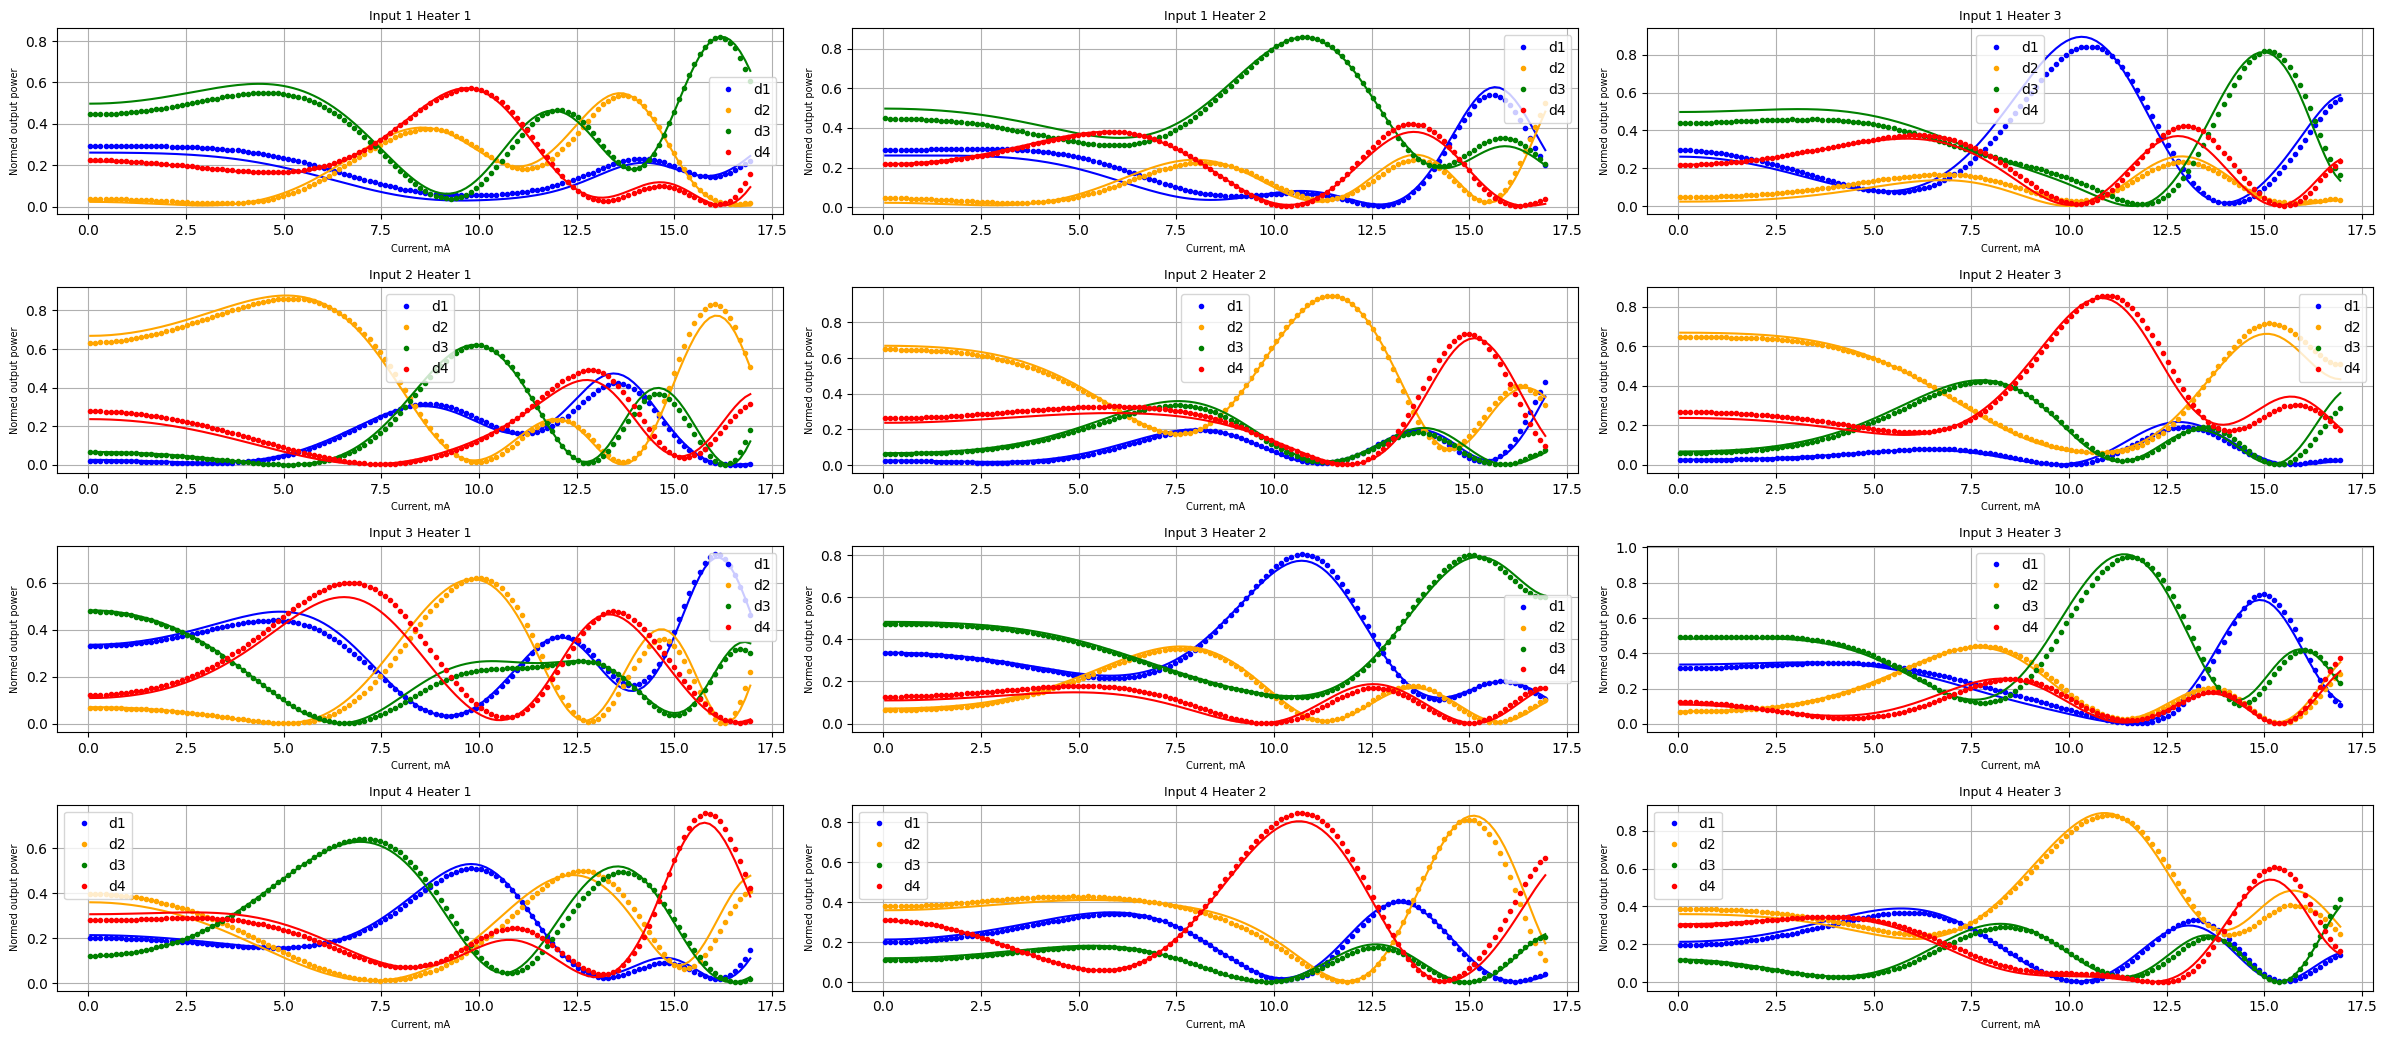

In [ ]:
labels = ['d1', 'd2', 'd3','d4']
colours = ['blue','orange','green','red']
ch = [1,2,3,4]
H = [1,2,3]
fig, axs = plt.subplots(4, 3)
scale = 3.
fig.set_figwidth(8*scale)
fig.set_figheight(3.5*scale)
axs_arr = [(0,0), (0,1), (0,2),
         (1,0), (1,1), (1,2),
         (2,0), (2,1), (2,2),
         (3,0), (3,1), (3,2)]
k = 0
for i in range(len(ch)):
        for j in range(len(H)):
            ax = axs[axs_arr[k]]
            for col in range(4):
                ax.plot(X, Y[131*(k):131*(k+1), col], '.', color = colours[col], label = labels[col])
                ax.plot(X, ans[131*(k):131*(k+1), col], color = colours[col])
            ax.set_title(f'Input {i+1} Heater {H[j]}' , fontsize=9)
            ax.set_xlabel('Current, mA', fontsize=7)
            ax.set_ylabel('Normed output power', fontsize=7)
            ax.legend()
            ax.grid(True)
            k+=1
fig.tight_layout()
plt.savefig('graph.pdf')